# Performance of the regressor

In [1]:
# System imports
import sys

# Data handling
import intake

# Custom functions from the authors' repo
sys.path.append("../src/general/")
sys.path.append("../src/pipelines/")
import CreateDataName as cn
from make_scatter_data_plots_cloud import make_scatter_plots

# Custom functions of the reproducibility team
from constants_cloud import *

## Scatter plot for the control regressor (Figure 2) - Different from above

We update the dictionary `run_vars`, such that `poly_degree` is set to `2` -- This helps us in defining the model so that it has second-order pairwise polynomial terms, in order to capture a limited amount of nonlinear behavior through interaction between terms. This means that as well as the above inputs, we have multiplicative pairs of features

In [2]:
# Setting up the parameters for the run
run_vars = {
    "dimension": 3,
    "lat": True,
    "lon": True,
    "dep": True,
    "current": True,
    "bolus_vel": True,
    "sal": True,
    "eta": True,
    "density": True,
    "poly_degree": 2,
    "StepSize": 1,
    "predict": "DelT",
}
data_name = data_prefix + cn.create_dataname(run_vars)
model_name = model_prefix + data_name

In [3]:
# Open data
cat = intake.open_catalog('.././data/inputs_models.yml')

#Loading Input Feature Arrays
norm_inputs_tr=cat[model_name].to_dask()['norm_inputs_tr']
norm_inputs_val=cat[model_name].to_dask()['norm_inputs_val']

The following script performs the following steps to make the scatter plot of predicted and true temperature change, allowing us to evaluate the performance of the control regressor.

<ol style="list-style-type: lower-alpha">
<li>Load the true temperature change arrays, persistence arrays to calculate climatology.</li>
<li>Load the trained model.</li>
<li>Calculate the predicted temperature changes using the input feature arrays and the trained model.</li>
<li>Denormalise the predictions and true outputs using the mean and standard deviation of the arrays.</li>
<li>Calculate the mean squared errors and make the scatter plot using the denormalized arrays.</li>
</ol>

/Users/acoca/anaconda3/envs/team3_EDSbook/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.0.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/acoca/anaconda3/envs/team3_EDSbook/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator GridSearchCV from version 1.0.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


predict values

  Predictions against truth for Training datasets for the control regressor 




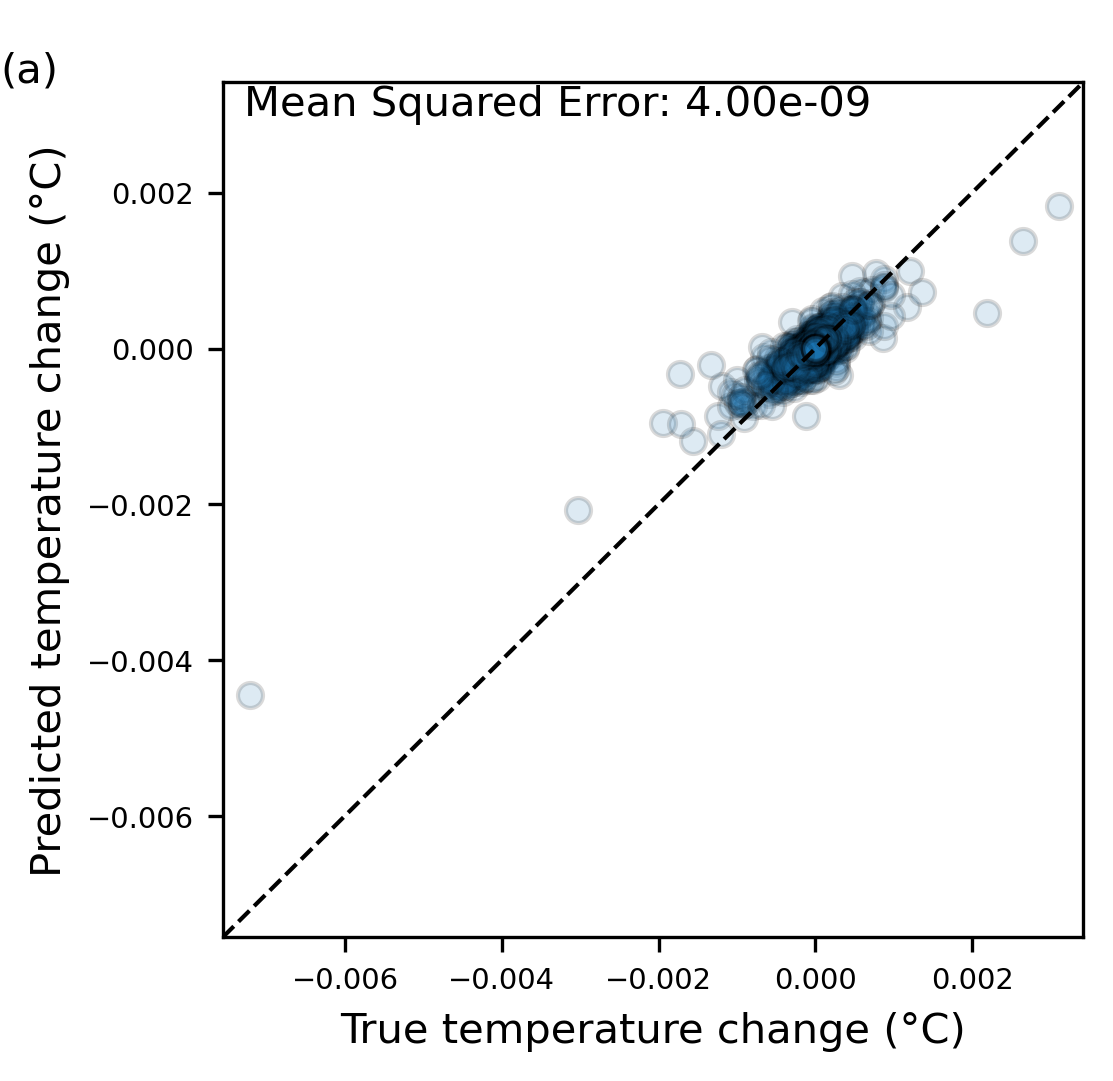


  Predictions against truth for Validation datasets for the control regressor 




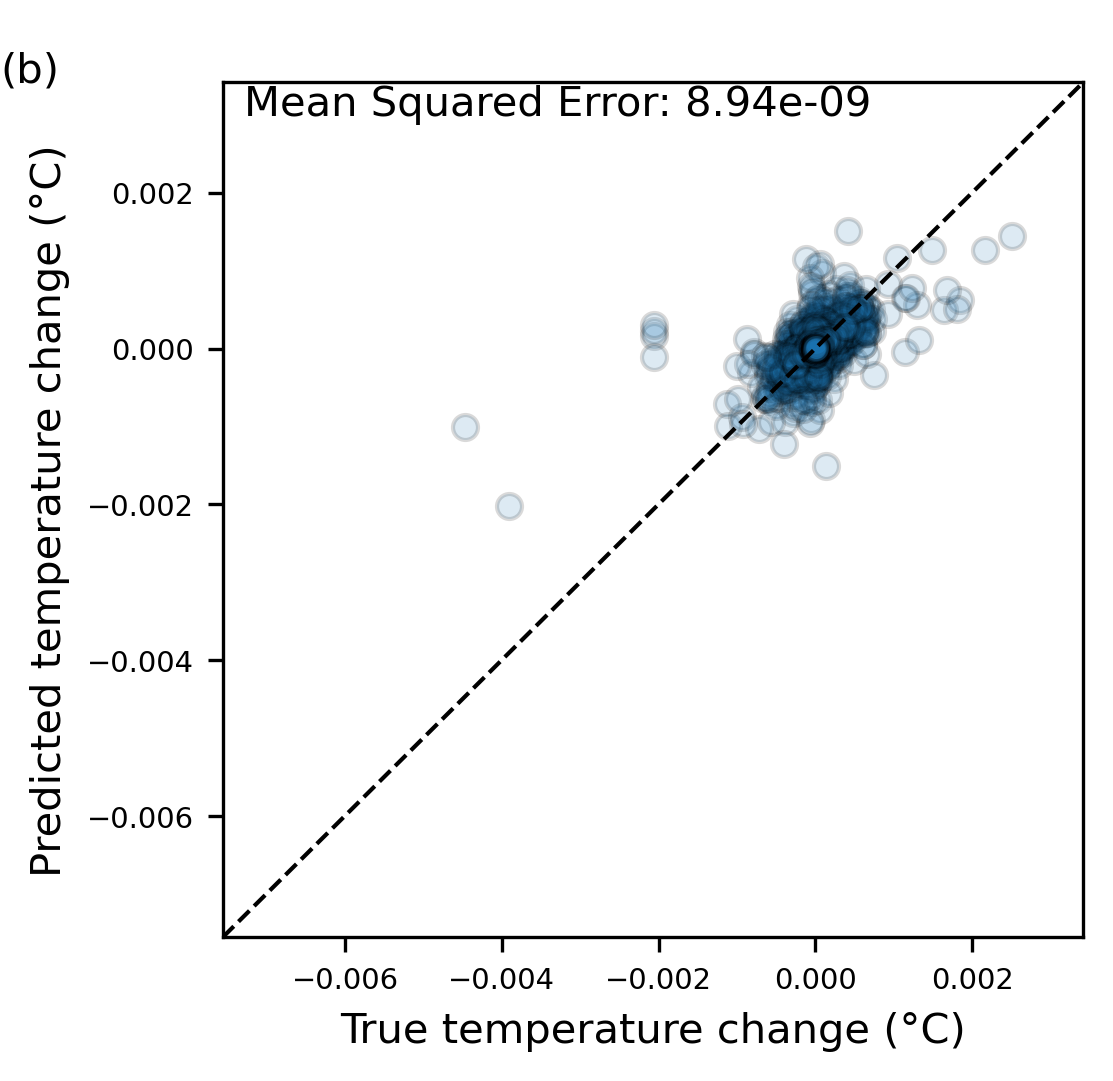

In [4]:
#| label: figure-2

make_scatter_plots(run_vars,data_name,model_name,norm_inputs_tr,norm_inputs_val,lim=15000,fig_prefix='fig2')

The model captures the central part of the distribution well. While the majority of the temperature change is dominated by small near-zero changes, capturing these is key to producing a good forecast system. To a lesser extent, the regressor also captures the tails of the distribution, where temperature changes are larger, although the underprediction is more significant here. However, it is noteworthy that the model still shows some skill for these points, given that the model used is very simple and there are a relatively limited number of training samples in the tails.

#### Spatial patterns of errors (Figure 3)
To understand how the regressor performs spatially, temporally averaged absolute errors are plotted.
These averaged errors are shown in Figure 3. Note that the regressor is only applied away from boundary and land points (in its current form, it cannot deal with spatial locations that are not surrounded on all sides by ocean points); hence, points close to land are not included in these plots. The script below performs the following steps:

<ol style="list-style-type: lower-alpha">
<li>It loads the the MITgcm state at 500 different times from the 20-year dataset, masks the locations that are not surrounded on all sides by ocean points, and uses these fields as inputs to the regressor to forecast a single time step ahead.</li>
<li>The set of forecasts created from these 500 input states is compared to the truth from the GCM run, and the absolute errors between the truth and the predictions are then temporally averaged.</li>
</ol>

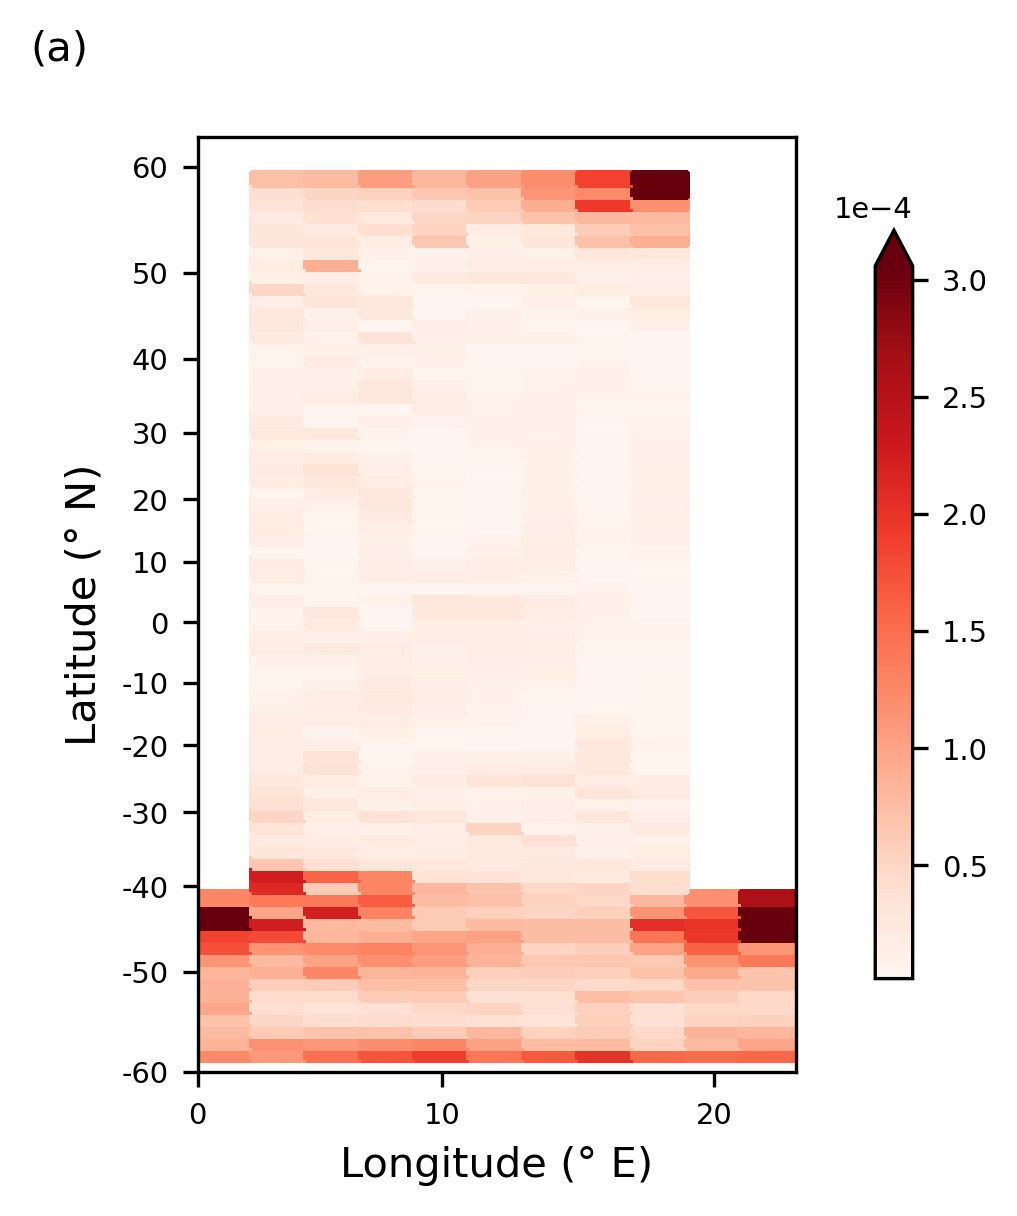

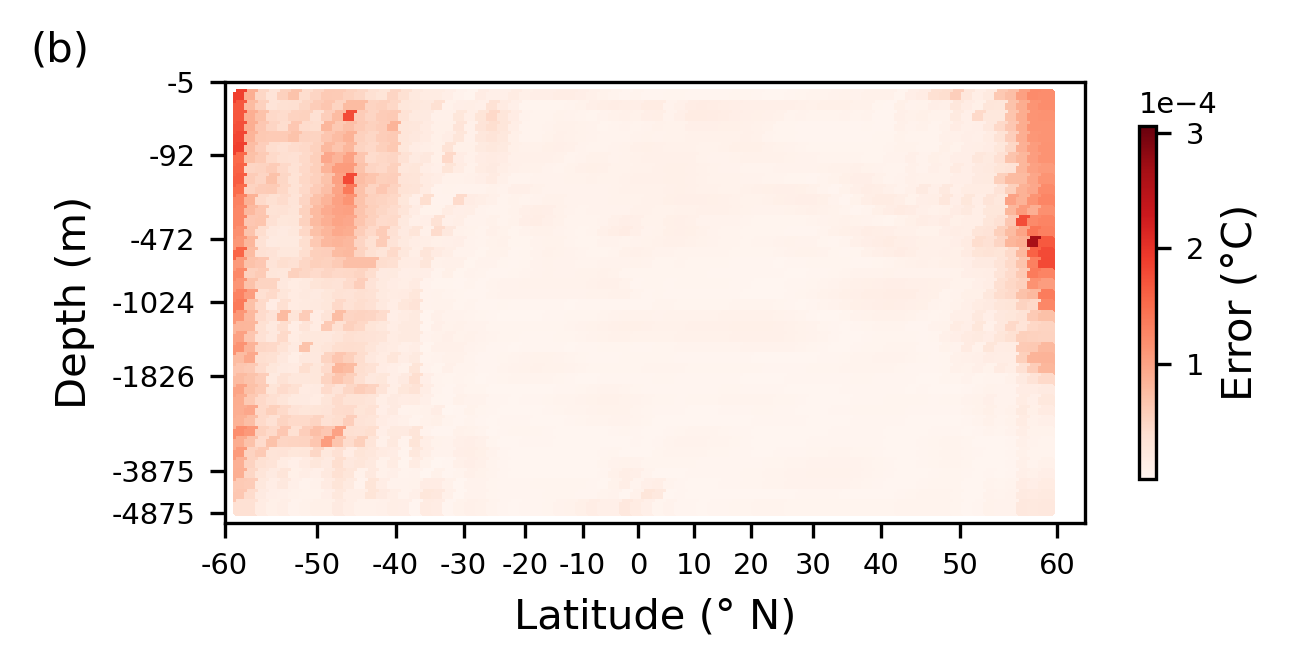

In [5]:
#| label: figure-3

%run ".././src/pipelines/spatial_patterns_errors_cloud.py"